In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'D:/data_science/Research/4.csv')

In [3]:
df.head(2)

,type,time,sender,attackerType,messageID,pos__001,pos__002,pos__003,pos_noise__001,pos_noise__002,pos_noise__003,spd__001,spd__002,spd__003,spd_noise__001,spd_noise__002,spd_noise__003
0,4,18000.023118,37,0,198,3650.092497,5186.984424,1.895,0.0,0.0,0.0,4.989724,-31.693251,0.0,0.0,0.0,0.0
1,4,18000.038918,109,0,288,3463.243621,5199.597797,1.895,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [4]:
df['attackerType'].value_counts()

0    3624
4     813
Name: attackerType, dtype: int64

In [5]:
df.drop(['type','pos_noise__001','pos_noise__002','pos_noise__003','spd_noise__001','spd_noise__002','spd_noise__003','spd__003'],axis = 1, inplace = True)

In [6]:
df.head(2)

,time,sender,attackerType,messageID,pos__001,pos__002,pos__003,spd__001,spd__002
0,18000.023118,37,0,198,3650.092497,5186.984424,1.895,4.989724,-31.693251
1,18000.038918,109,0,288,3463.243621,5199.597797,1.895,0.000000,0.000000


In [7]:
x = df[['time','sender','messageID','pos__001','pos__002','pos__003','spd__001','spd__002']]
y = df.iloc[:,2:3].values

In [8]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

Using TensorFlow backend.
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [9]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [10]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
#Building Model
from sklearn.tree import DecisionTreeClassifier
reg = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [12]:
#checking Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.71%


[[939  19]
 [ 43 882]]


C:\Users\Jayesh\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1, 'Decision Tree')

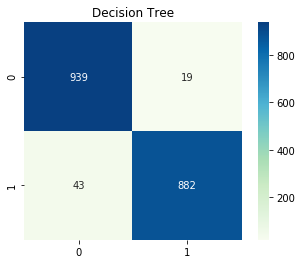

In [15]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
print(con)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
ax.set_title('Decision Tree')

In [16]:
from sklearn.metrics import classification_report
print('Decision Tree')
print(classification_report(y_test, y_pred))


Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       958
           4       0.98      0.95      0.97       925

    accuracy                           0.97      1883
   macro avg       0.97      0.97      0.97      1883
weighted avg       0.97      0.97      0.97      1883



[0. 1. 1. ... 0. 0. 0.]
Logistic : ROC AUC = 0.967


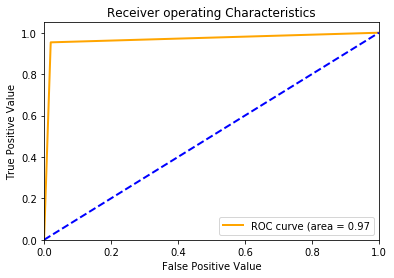

In [14]:
#ROC and AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_probs = reg.predict_proba(x_test)
clf_probs = clf_probs[:,1]
print(clf_probs)
ras = roc_auc_score(y_test,clf_probs)
print("Logistic : ROC AUC = %.3f" %(ras))
from sklearn.preprocessing import label_binarize
y = label_binarize(y_test,classes = [0,4])
n_classes = y.shape[1]
fpr,tpr,_ = roc_curve(y,clf_probs)
plt.figure()
lw = 2
plt.plot(fpr,tpr, color = "orange", lw = lw, label = "ROC curve (area = %0.2f" % ras)
plt.plot([0,1],[0,1], color = "blue",lw = lw, linestyle = '--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Value')
plt.ylabel('True Positive Value')
plt.title('Receiver operating Characteristics')
plt.legend(loc = "lower right")
plt.show()